In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('train.xlsx')
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [3]:
df.shape

(11094, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [5]:
df['Average_Cost'].value_counts()

₹200      3241
₹100      2557
₹150      2462
₹250       881
₹300       537
₹350       283
₹400       282
₹50        265
₹600       154
₹500       101
₹450        63
₹550        60
₹650        55
₹800        44
₹750        38
₹900        15
₹700        15
₹1,000      12
₹850        12
₹1,200       8
₹950         4
for          1
₹1,400       1
₹1,100       1
₹2,050       1
₹1,150       1
Name: Average_Cost, dtype: int64

In [6]:
df['Average_Cost'] = df['Average_Cost'].str.replace('₹','').str.replace(',','')
df['Minimum_Order'] = df['Minimum_Order'].str.replace('₹','')

In [7]:
df['Minimum_Order'] = df['Minimum_Order'].astype(int)

In [8]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes


In [9]:
dictionary = ['Temporarily Closed','Opening Soon','NEW','-']
df['Rating'][df['Rating'].isin(dictionary)] = np.nan

C:\Users\Stavan\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df['Rating'].fillna(0,inplace=True)

In [11]:
df['Votes'] = df['Votes'].str.replace('-','0')

In [12]:
df['Votes'].value_counts()

0       2074
4        248
6        200
7        182
9        181
        ... 
637        1
756        1
1083       1
502        1
3143       1
Name: Votes, Length: 1103, dtype: int64

In [13]:
df['Reviews'] = df['Reviews'].str.replace('-','0')

In [14]:
# checking for null values
df.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  int32 
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: int32(1), object(8)
memory usage: 736.8+ KB


In [16]:
df["Average_Cost"] = df["Average_Cost"].str.replace("for", "0")

In [17]:
df["Average_Cost"] = df["Average_Cost"].astype(int)
df["Rating"] = df["Rating"].astype(float)
df["Votes"] = df["Votes"].astype(int)
df["Reviews"] = df["Reviews"].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     11094 non-null  object 
 1   Location       11094 non-null  object 
 2   Cuisines       11094 non-null  object 
 3   Average_Cost   11094 non-null  int32  
 4   Minimum_Order  11094 non-null  int32  
 5   Rating         11094 non-null  float64
 6   Votes          11094 non-null  int32  
 7   Reviews        11094 non-null  int32  
 8   Delivery_Time  11094 non-null  object 
dtypes: float64(1), int32(4), object(4)
memory usage: 606.8+ KB


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '30 minutes'),
  Text(1, 0, '65 minutes'),
  Text(2, 0, '45 minutes'),
  Text(3, 0, '10 minutes'),
  Text(4, 0, '20 minutes'),
  Text(5, 0, '120 minutes'),
  Text(6, 0, '80 minutes')])

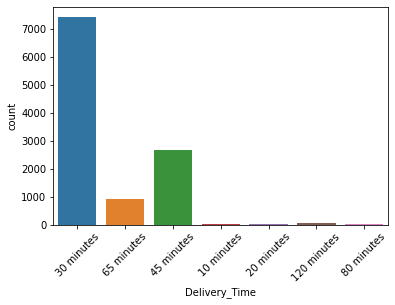

In [19]:
sns.countplot(df['Delivery_Time'])
plt.xticks(rotation=45)

In [20]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes


In [21]:
df['Area'] = df['Location'].str.split(',').str[-1]
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Area
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes,Marathalli
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes,Mumbai Central
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes,Whitefield


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
rest_avg_cost = df.pivot_table(values=['Average_Cost'], index=['Restaurant'])

In [24]:
oneD = pd.Series(data=le.fit_transform(rest_avg_cost['Average_Cost']), index = rest_avg_cost.index)

In [25]:
df['Restaurant'] = df['Restaurant'].map(oneD)

In [26]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Area
0,33,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200,50,3.5,12,4,30 minutes,Pune
1,3,"Sector 3, Marathalli","Ice Cream, Desserts",100,50,3.5,11,4,30 minutes,Marathalli
2,15,Mumbai Central,"Italian, Street Food, Fast Food",150,50,3.6,99,30,65 minutes,Mumbai Central
3,49,"Sector 1, Noida","Mughlai, North Indian, Chinese",250,99,3.7,176,95,30 minutes,Noida
4,33,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200,99,3.2,521,235,65 minutes,Whitefield


In [27]:
area_count = df['Area'].value_counts().to_dict()
df['Area'] = df['Area'].map(area_count)

In [28]:
food_variety = df["Cuisines"].value_counts().to_dict()
df["Cuisines"] =df["Cuisines"].map(food_variety)

In [29]:
df.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Area
0,33,"FTI College, Law College Road, Pune",1,200,50,3.5,12,4,30 minutes,1358
1,3,"Sector 3, Marathalli",61,100,50,3.5,11,4,30 minutes,366
2,15,Mumbai Central,3,150,50,3.6,99,30,65 minutes,459
3,49,"Sector 1, Noida",16,250,99,3.7,176,95,30 minutes,2086
4,33,"Rmz Centennial, I Gate, Whitefield",14,200,99,3.2,521,235,65 minutes,457


In [30]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).sum()

Area                0
Average_Cost      867
Cuisines         1898
Delivery_Time       0
Location            0
Minimum_Order     976
Rating           1963
Restaurant        838
Reviews          1490
Votes            1420
dtype: int64

In [31]:
cols = ['Restaurant', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews']

for i in cols:
    Q3,Q1 = np.percentile(df[i], [75,25])
    IQR = Q3-Q1
    minima = Q1-1.5*IQR
    maxima = Q3+1.5*IQR
    df.loc[df[i] < minima, i] = minima
    df.loc[df[i] > maxima, i] = maxima

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).sum()

Area             0
Average_Cost     0
Cuisines         0
Delivery_Time    0
Location         0
Minimum_Order    0
Rating           0
Restaurant       0
Reviews          0
Votes            0
dtype: int64

In [34]:
df.skew()

Restaurant       0.556002
Cuisines         1.201727
Average_Cost     0.652784
Minimum_Order    0.000000
Rating          -0.877016
Votes            1.206945
Reviews          1.196568
Area             0.868114
dtype: float64

In [35]:
cols = ['Restaurant', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Area']

for i in cols:
    df[i] = np.log(df[i]+1)

In [36]:
df.skew()

Restaurant      -0.744979
Cuisines        -0.064990
Average_Cost    -0.428448
Minimum_Order    0.000000
Rating          -1.121949
Votes           -0.426981
Reviews         -0.120592
Area            -0.082398
dtype: float64

In [37]:
x = df.drop(['Delivery_Time','Location'], axis =1) #independent variable
y = df['Delivery_Time'] #dependent variable

In [38]:
x.shape, y.shape

((11094, 8), (11094,))

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.06659639 0.15696313 0.04119509 0.         0.16669484 0.24457878
 0.18766923 0.13630255]


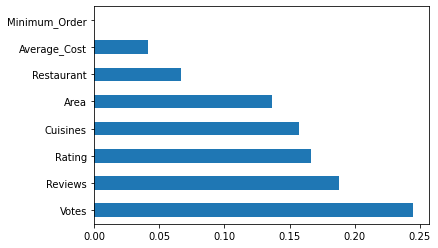

In [40]:
feat_imp = pd.Series(model.feature_importances_, index = x.columns)
feat_imp.nlargest(9).plot(kind='barh')
plt.show()

In [41]:
x = x.drop('Minimum_Order', axis=1)
x.head()

,Restaurant,Cuisines,Average_Cost,Rating,Votes,Reviews,Area
0,3.526361,0.693147,5.303305,1.504077,2.564949,1.609438,7.214504
1,1.386294,4.127134,4.615121,1.504077,2.484907,1.609438,5.905362
2,2.772589,1.386294,5.017280,1.526056,4.605170,3.433987,6.131226
3,3.912023,2.833213,5.525453,1.547563,5.176150,4.564348,7.643483
4,3.526361,2.708050,5.303305,1.435085,5.948035,5.046646,6.126869


In [42]:
# handling imbalance data
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
smote = SMOTE(k_neighbors=2)
X,Y = smote.fit_sample(x,y)

In [43]:
from collections import Counter
print("Before:", Counter(y))
print("After:", Counter(Y))

Before: Counter({'30 minutes': 7406, '45 minutes': 2665, '65 minutes': 923, '120 minutes': 62, '20 minutes': 20, '80 minutes': 14, '10 minutes': 4})
After: Counter({'30 minutes': 7406, '65 minutes': 7406, '45 minutes': 7406, '10 minutes': 7406, '20 minutes': 7406, '120 minutes': 7406, '80 minutes': 7406})


In [44]:
X.shape, Y.shape

((51842, 7), (51842,))

In [45]:
x.shape, y.shape

((11094, 7), (11094,))

In [46]:
Y = Y.str.split(' ').str[0]
Y

0        30
1        30
2        65
3        30
4        65
         ..
51837    80
51838    80
51839    80
51840    80
51841    80
Name: Delivery_Time, Length: 51842, dtype: object

In [47]:
# Train, Test and Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

## Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [49]:
y_pred = rf.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, r2_score
from sklearn import metrics

In [51]:
r2_score(y_test,y_pred)

0.9717582675548383

In [52]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  2.142989268573525
MSE:  35.68004149050231
RMSE:  5.973277282238144


## Linear Regression

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [68]:
lr_pred = lr.predict(X_test)

In [69]:
lr_pred

array([65.71198479, 75.62366767, 52.39381226, ..., 43.956238  ,
       83.82446332, 43.87908936])

In [70]:
r2_score(y_test,lr_pred)

0.1836004028897421

In [63]:
print('MAE: ', metrics.mean_absolute_error(y_test, lr_pred))
print('MSE: ', metrics.mean_squared_error(y_test, lr_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

MAE:  25.101030443024545
MSE:  1031.4229679175958
RMSE:  32.11577444057041
